In [1]:
import os
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from collections import Counter

DATABASE_DIR = './database'

aminoacids = [
    'ALA',
    'ARG',
    'ASN',
    'ASP',
    'CYS',
    'GLN',
    'GLU',
    'GLY',
    'HIS',
    'LEU',
    'ILE',
    'LYS',
    'MET',
    'PHE',
    'PRO',
    'SER',
    'THR',
    'TRP',
    'TYR',
    'VAL',
]

nucleotides = [
    'A',
    'U',
    'C',
    'G',
]

# PDB

In [2]:
def getChainIds(lines):
  chainIds = []
  for l in lines:
    if l[21] not in chainIds:
      chainIds.append(l[21])

  return chainIds

def getProteinChain(chainId, lines):
  atoms = {}
  for l in lines:
    if l[21] == chainId and l[13:15] == 'CA':
      resSeq = int(l[22:26])
      x = float(l[30:38])
      y = float(l[39:46])
      z = float(l[47:54])
      atoms[resSeq] = {
          'name': l[17:20].strip(),
          'position': (x, y, z),
      }
  return atoms

def getRNAChain(chainId, lines):
  atoms = {}
  for l in lines:
    if l[21] == chainId and l[18:20].strip() in nucleotides:
      resSeq = int(l[22:26])
      x = float(l[30:38])
      y = float(l[39:46])
      z = float(l[47:54])
      atoms[resSeq] = {
          'name': l[17:20].strip(),
          'position': (x, y, z),
      }
  return atoms

def getProteinAminoacids(chainId, lines):
  atoms = {}
  for l in lines:
    if l[21] == chainId and l[13:15] == 'CA':
      resSeq = int(l[22:26])
      atoms[resSeq] = l[17:20].strip()
  return atoms

def getRNANucleotides(chainId, lines):
  atoms = {}
  nucleotides = ['A', 'U', 'C', 'G']
  for l in lines:
    if l[21] == chainId and l[18:20].strip() in nucleotides:
      resSeq = int(l[22:26])
      atoms[resSeq] = l[18:20].strip()
  return atoms

In [3]:
def readFiles():
  proteinChains = {}
  RNAChains = {}
  for filename in os.listdir(DATABASE_DIR):
    with open(f'{DATABASE_DIR}/{filename}', 'r') as fr:
      lines = fr.readlines()
      structCode = filename[:4]
      chainIDs = getChainIds(lines)
      if len(chainIDs) == 2:
        for chainID in chainIDs:
          proteinChain = getProteinChain(chainID, lines)
          if proteinChain != {}:
            proteinChains[structCode] = proteinChain
          RNAChain = getRNAChain(chainID, lines)
          if RNAChain != {}:
            RNAChains[structCode] = RNAChain

  return proteinChains, RNAChains

proteinChains, RNAChains = readFiles()

In [4]:
def getAtoms():
  proteinAminoacids = {}
  RNANucleotides = {}
  for filename in os.listdir(DATABASE_DIR):
    with open(f'{DATABASE_DIR}/{filename}', 'r') as fr:
      lines = fr.readlines()
      structCode = filename[:4]
      chainIDs = getChainIds(lines)
      if len(chainIDs) == 2:
        for chainID in chainIDs:
          proteinAminoacid = getProteinAminoacids(chainID, lines)
          if proteinAminoacid != {}:
            proteinAminoacids[structCode] = proteinAminoacid
          RNANucleotide = getRNANucleotides(chainID, lines)
          if RNANucleotide != {}:
            RNANucleotides[structCode] = RNANucleotide

  return proteinAminoacids, RNANucleotides

proteinAminoacids, RNANucleotides = getAtoms()

In [5]:
protein_aminoacids = {}

for key, v in proteinAminoacids.items():
  res = Counter(v.values())
  protein_aminoacids[key] = res

In [6]:
plot_protein_data = []

for key, values in proteinChains.items():
  plot_protein_data.append(
      [
          key,
          len(values)
      ]
  )


protein_df = pd.DataFrame (
    plot_protein_data,
    columns = [
        'Structure',
        'Number of amino acids'
    ]
)

protein_df

,Structure,Number of amino acids
0,7kjt,145
1,2ad9,98
2,1emi,136
3,7x34,100
4,7og6,199
...,...,...
180,6r9o,594
181,6hpj,84
182,7yn9,1514
183,2adb,127


In [7]:
plot_protein_aminoacides_data = []

for key, values in proteinChains.items():
  plot_protein_aminoacides_data.append(
      [
          key,
          protein_aminoacids[key]['ALA'],
          protein_aminoacids[key]['ARG'],
          protein_aminoacids[key]['ASN'],
          protein_aminoacids[key]['ASP'],
          protein_aminoacids[key]['CYS'],
          protein_aminoacids[key]['GLN'],
          protein_aminoacids[key]['GLU'],
          protein_aminoacids[key]['GLY'],
          protein_aminoacids[key]['HIS'],
          protein_aminoacids[key]['LEU'],
          protein_aminoacids[key]['ILE'],
          protein_aminoacids[key]['LYS'],
          protein_aminoacids[key]['MET'],
          protein_aminoacids[key]['PHE'],
          protein_aminoacids[key]['PRO'],
          protein_aminoacids[key]['SER'],
          protein_aminoacids[key]['THR'],
          protein_aminoacids[key]['TRP'],
          protein_aminoacids[key]['TYR'],
          protein_aminoacids[key]['VAL'],
      ]
  )


protein_aminoacides_df = pd.DataFrame (
    plot_protein_aminoacides_data,
    columns = [
        'Structure',
        'ALA',
        'ARG',
        'ASN',
        'ASP',
        'CYS',
        'GLN',
        'GLU',
        'GLY',
        'HIS',
        'LEU',
        'ILE',
        'LYS',
        'MET',
        'PHE',
        'PRO',
        'SER',
        'THR',
        'TRP',
        'TYR',
        'VAL',
    ]
)

protein_aminoacides_df

,Structure,ALA,ARG,ASN,ASP,CYS,GLN,GLU,GLY,HIS,...,ILE,LYS,MET,PHE,PRO,SER,THR,TRP,TYR,VAL
0,7kjt,10,10,8,7,2,4,15,10,3,...,23,13,3,6,2,3,3,1,1,9
1,2ad9,5,5,7,3,0,4,6,7,2,...,7,6,3,3,6,8,7,0,3,8
2,1emi,6,20,1,7,1,2,10,13,2,...,12,9,1,2,9,5,6,1,6,13
3,7x34,19,2,4,9,0,1,7,4,0,...,5,18,0,2,1,9,4,0,2,6
4,7og6,26,5,17,5,2,12,8,8,1,...,8,8,2,14,15,17,19,2,3,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,6r9o,23,26,43,30,11,17,49,23,14,...,43,40,9,28,21,41,39,4,35,33
181,6hpj,5,10,4,12,1,0,5,9,0,...,6,3,0,5,7,2,1,0,5,6
182,7yn9,84,107,69,108,32,37,121,106,33,...,68,146,24,80,83,76,73,29,42,79
183,2adb,11,4,8,10,2,9,1,6,2,...,7,7,3,7,6,10,8,0,5,7


In [8]:
tot_aminoacids = []
for column in aminoacids:
  tot = protein_aminoacides_df[column].sum()
  tot_aminoacids.append(tot)

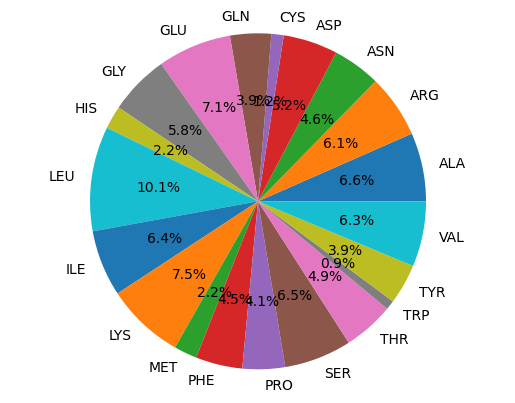

In [9]:
fig1, ax1 = plt.subplots()
ax1.pie(tot_aminoacids,
        labels=aminoacids,
        autopct='%1.1f%%')

ax1.axis('equal')
plt.savefig('imgs/general/aminoacid_frequency.png', bbox_inches='tight')

In [10]:
rna_nucleotides = {}

for key, v in RNANucleotides.items():
  res = Counter(v.values())
  rna_nucleotides[key] = res

In [11]:
plot_rna_data = []

for key, values in RNAChains.items():
  plot_rna_data.append(
      [
          key,
          len(values)
      ]
  )

rna_df = pd.DataFrame (
    plot_rna_data,
    columns = [
        'Structure',
        'Number of nucleotides'
    ]
)

rna_df

,Structure,Number of nucleotides
0,7kjt,70
1,2ad9,6
2,1emi,161
3,7x34,94
4,7og6,5
...,...,...
180,6r9o,4
181,6hpj,6
182,7yn9,38
183,2adb,6


In [12]:
plot_rna_nucleotides_data = []

for key, values in RNAChains.items():
  plot_rna_nucleotides_data.append(
      [
          key,
          rna_nucleotides[key]['A'],
          rna_nucleotides[key]['U'],
          rna_nucleotides[key]['C'],
          rna_nucleotides[key]['G'],
      ]
  )

rna_nucleotides_df = pd.DataFrame (
    plot_rna_nucleotides_data,
    columns = [
        'Structure',
        'A',
        'U',
        'C',
        'G',
    ]
)

rna_nucleotides_df

,Structure,A,U,C,G
0,7kjt,12,12,23,23
1,2ad9,0,3,3,0
2,1emi,33,39,39,50
3,7x34,31,20,18,25
4,7og6,0,5,0,0
...,...,...,...,...,...
180,6r9o,2,0,0,2
181,6hpj,5,0,1,0
182,7yn9,13,9,8,8
183,2adb,0,3,3,0


In [13]:
tot_nucleotides = []
for column in nucleotides:
  tot = rna_nucleotides_df[column].sum()
  tot_nucleotides.append(tot)

tot_nucleotides

[1868, 1750, 1826, 2080]

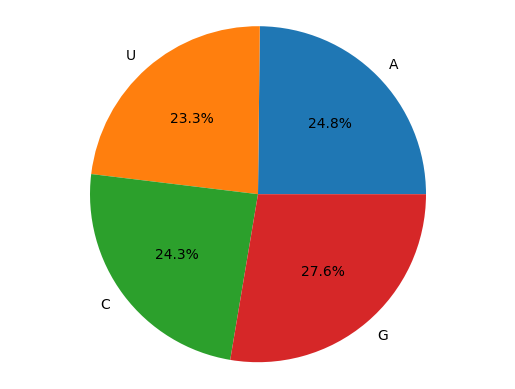

In [14]:
fig1, ax1 = plt.subplots()
ax1.pie(tot_nucleotides,
        labels=nucleotides,
        autopct='%1.1f%%')

ax1.axis('equal')
plt.savefig('imgs/general/nucleotides_frequency.png', bbox_inches='tight')

In [15]:
df = pd.merge(protein_df, rna_df, on = "Structure")

df

,Structure,Number of amino acids,Number of nucleotides
0,7kjt,145,70
1,2ad9,98,6
2,1emi,136,161
3,7x34,100,94
4,7og6,199,5
...,...,...,...
180,6r9o,594,4
181,6hpj,84,6
182,7yn9,1514,38
183,2adb,127,6


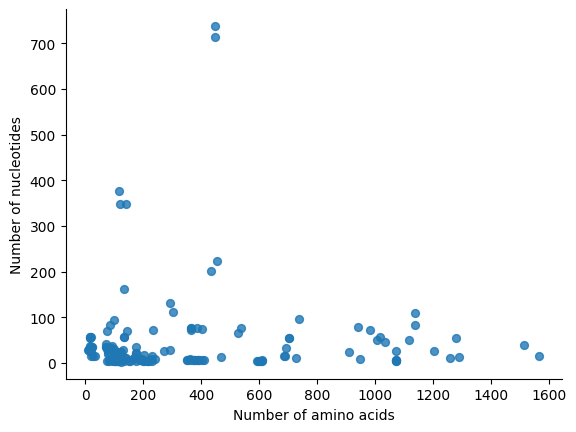

In [16]:
df.plot(kind='scatter', x='Number of amino acids', y='Number of nucleotides', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

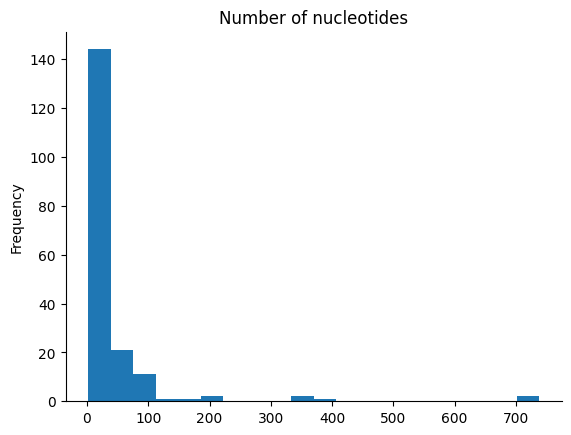

In [17]:
df['Number of nucleotides'].plot(kind='hist', bins=20, title='Number of nucleotides')
plt.gca().spines[['top', 'right',]].set_visible(False)

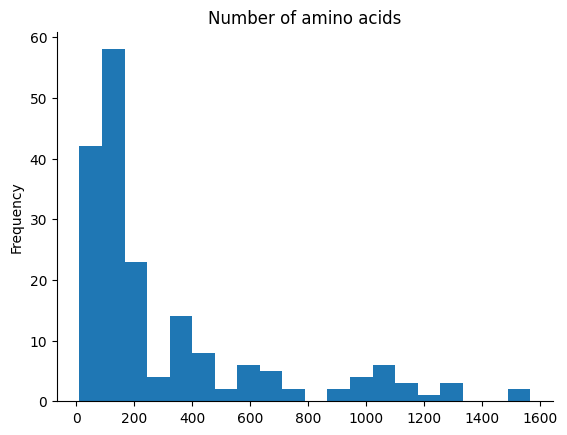

In [18]:
df['Number of amino acids'].plot(kind='hist', bins=20, title='Number of amino acids')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [19]:
plot_rna_data = []

for key, values in RNAChains.items():
  if len(values) < 150:
    plot_rna_data.append([key, len(values)])


rna_df = pd.DataFrame(plot_rna_data, columns=['Structure', 'Number of nucleotides'])
rna_df

,Structure,Number of nucleotides
0,7kjt,70
1,2ad9,6
2,7x34,94
3,7og6,5
4,2n82,23
...,...,...
172,6r9o,4
173,6hpj,6
174,7yn9,38
175,2adb,6


In [20]:
plot_protein_data = []

for key, values in proteinChains.items():
  if len(values) < 800:
    plot_protein_data.append([key, len(values)])

protein_df = pd.DataFrame(plot_protein_data, columns=['Structure', 'Number of amino acids'])
print(protein_df)

    Structure  Number of amino acids
0        7kjt                    145
1        2ad9                     98
2        1emi                    136
3        7x34                    100
4        7og6                    199
..        ...                    ...
159      1etf                     23
160      6r9o                    594
161      6hpj                     84
162      2adb                    127
163      2cjk                    167

[164 rows x 2 columns]


In [21]:
df = pd.merge(protein_df, rna_df, on = "Structure")

df

,Structure,Number of amino acids,Number of nucleotides
0,7kjt,145,70
1,2ad9,98,6
2,7x34,100,94
3,7og6,199,5
4,2n82,104,23
...,...,...,...
151,1etf,23,34
152,6r9o,594,4
153,6hpj,84,6
154,2adb,127,6


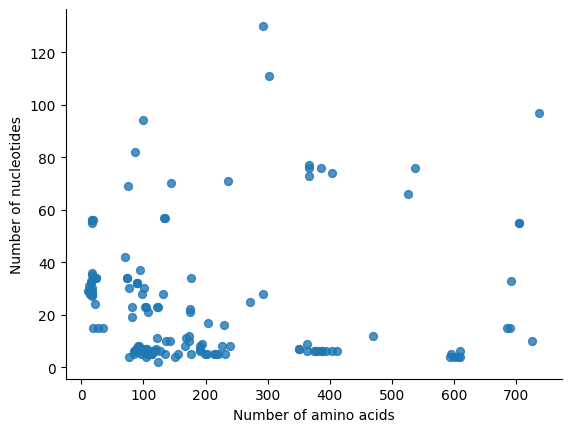

In [22]:
df.plot(kind='scatter', x='Number of amino acids', y='Number of nucleotides', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.savefig('imgs/general/distribution.png', bbox_inches='tight')

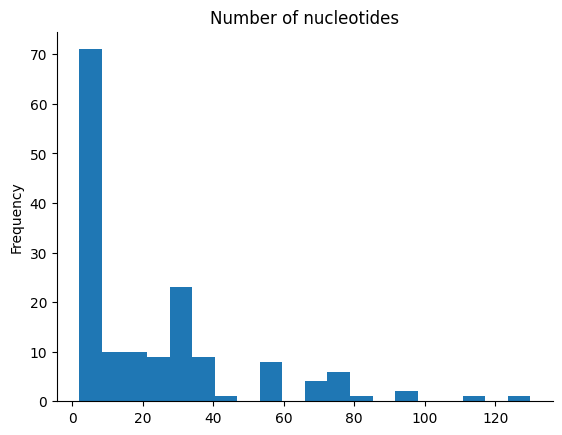

In [23]:
df['Number of nucleotides'].plot(kind='hist', bins=20, title='Number of nucleotides')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.savefig('imgs/general/nucleotide_frequency_hist.png', bbox_inches='tight')

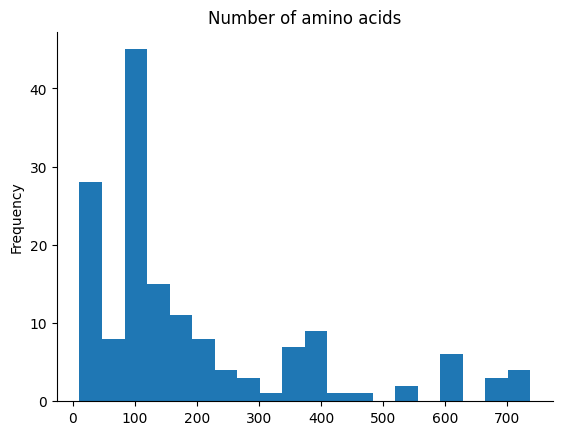

In [24]:
df['Number of amino acids'].plot(kind='hist', bins=20, title='Number of amino acids')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.savefig('imgs/general/aminoacid_frequency_hist.png', bbox_inches='tight')

## Distance Analisis

In [25]:
def dist(a1, a2):
  p1 = a1['position']
  p2 = a2['position']
  x = 0
  y = 1
  z = 2
    
  return math.sqrt((p1[x] - p2[x])**2 + (p1[y] - p2[y])**2 + (p1[z] - p2[z])**2)

def distMap(proteinAtoms, RNAAtoms):
  m = []
  i = 0
  for a1 in proteinAtoms:
    for a2 in RNAAtoms:
      distance = dist(proteinAtoms[a1], RNAAtoms[a2])

      if distance < 5:
        m.append({
            'from': proteinAtoms[a1]['name'],
            'to': RNAAtoms[a2]['name'],
            'dist': distance
        })
        i+=1
          
  return m

In [26]:
def getChain(chainId, lines):
  atoms = {}
  for l in lines:
    if l[21] == chainId and l[18:20].strip() in nucleotides:
      resSeq = int(l[22:26])
      x = float(l[30:38])
      y = float(l[39:46])
      z = float(l[47:54])
        
      atoms[resSeq] = {
          'name': l[18:20].strip(),
          'position': (x, y, z),
      }
        
    elif l[21] == chainId and l[13:15] == 'CA':
      resSeq = int(l[22:26])
      x = float(l[30:38])
      y = float(l[39:46])
      z = float(l[47:54])
        
      atoms[resSeq] = {
          'name': l[17:20].strip(),
          'position': (x, y, z),
      }
        
  return atoms

def getChains():
  chains = {}
  for filename in os.listdir(DATABASE_DIR):
    with open(f'{DATABASE_DIR}/{filename}', 'r') as fr:
      lines = fr.readlines()
      structCode = filename[:4]
      chainIDs = getChainIds(lines)
      if len(chainIDs) == 2:
        for chainID in chainIDs:
          chain = getChain(chainID, lines)
          if chain != {}:
            chains[structCode] = chain

  return chains

chains = getChains()

In [27]:
interactionsPDB = {}
interactions = []

for key, values in proteinChains.items():
  d = distMap(proteinChains[key], RNAChains[key])
  interactionsPDB[key] = d

  for val in d:
    interactions.append(val)

In [28]:
def getList(interactions, aminoacid):
  resp = []
  for i in interactions:
    if i['from'] == aminoacid:
      resp.append(i['to'])

  return resp

interaction_stats = {}

for val in interactions:
  interaction_stats[val['from']] = getList(interactions, val['from'])

In [29]:
def getAminoacidFreq(interactions):
  freq = {}
  for key, stat in interactions.items():
    freq[key] = {
      nucleotides[0]: stat.count(nucleotides[0]),
      nucleotides[1]: stat.count(nucleotides[1]),
      nucleotides[2]: stat.count(nucleotides[2]),
      nucleotides[3]: stat.count(nucleotides[3])
    }

  return freq

frequency = getAminoacidFreq(interaction_stats)

In [30]:
def mountFrequencyDf(frequency):
  plot_frequency_data = []
    
  for key, values in frequency.items():
    plot_frequency_data.append(
      [
          key,
          frequency[key]['A'],
          frequency[key]['U'],
          frequency[key]['C'],
          frequency[key]['G'],
      ]
    )

  return pd.DataFrame (
    plot_frequency_data,
    columns = [
        'Aminoacid',
        'A',
        'U',
        'C',
        'G',
    ]
  )

frequency_df = mountFrequencyDf(frequency)
frequency_df.sort_values(by=['Aminoacid'])

,Aminoacid,A,U,C,G
0,ALA,24,6,8,7
10,ARG,19,20,9,19
7,ASN,13,8,4,6
3,ASP,1,3,1,7
19,CYS,1,1,1,0
17,GLN,4,2,2,7
9,GLU,6,2,0,3
2,GLY,25,30,26,25
18,HIS,4,3,1,7
13,ILE,9,8,2,5


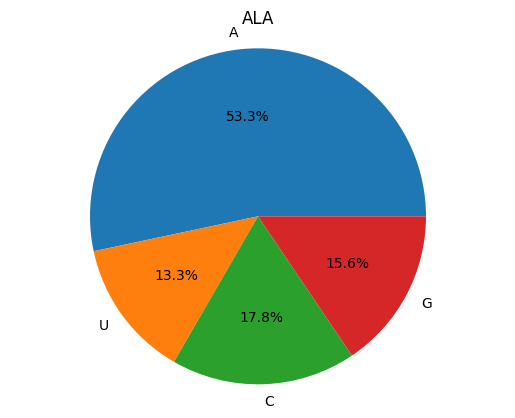

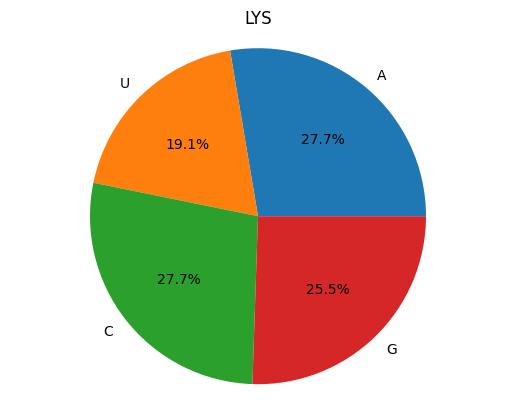

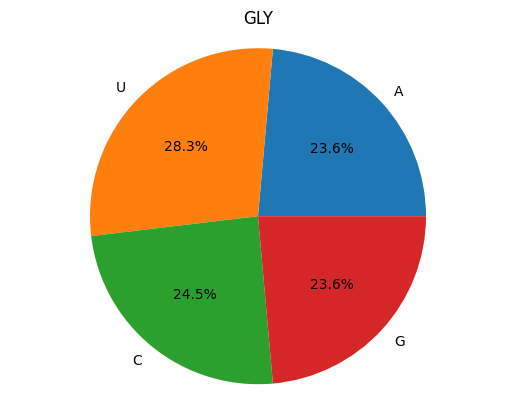

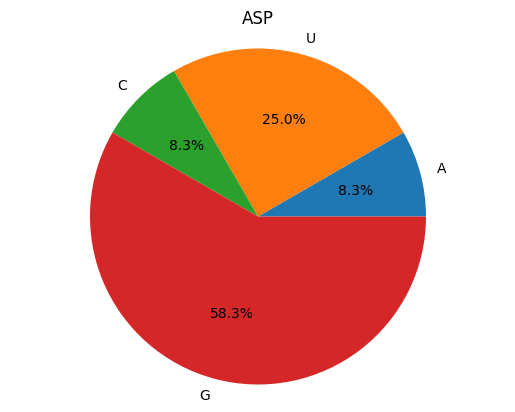

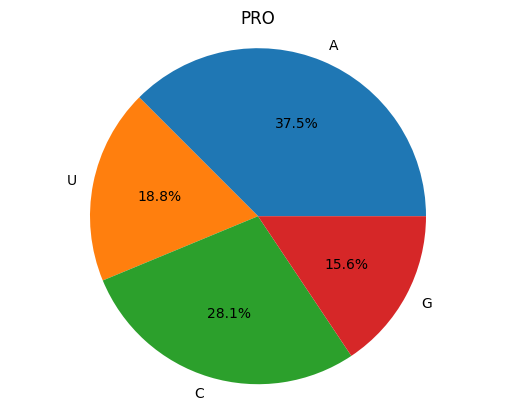

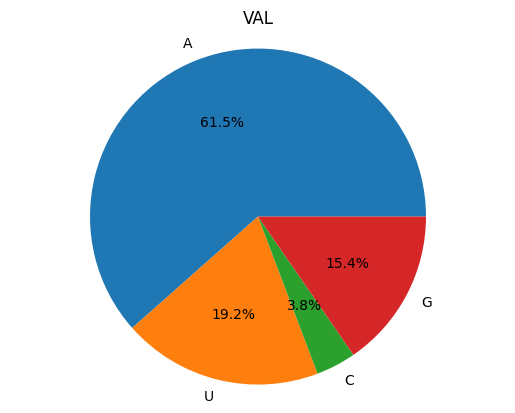

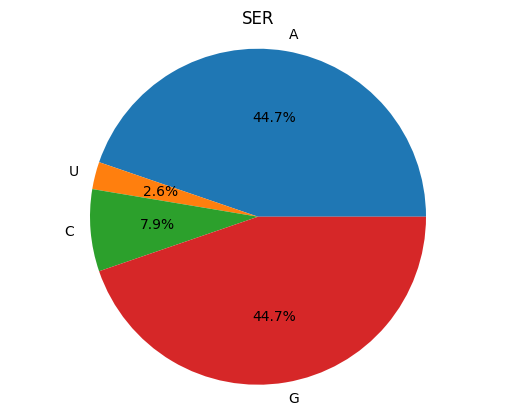

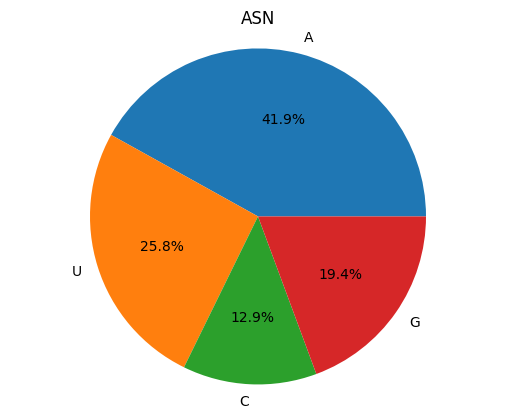

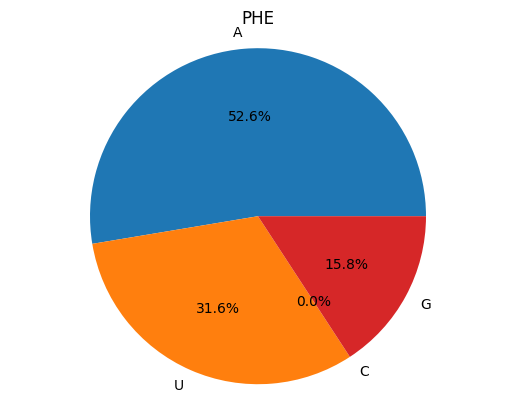

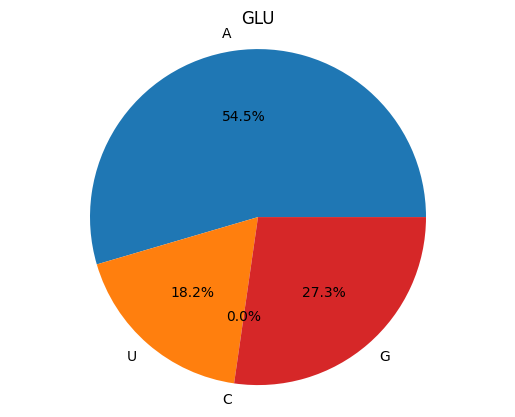

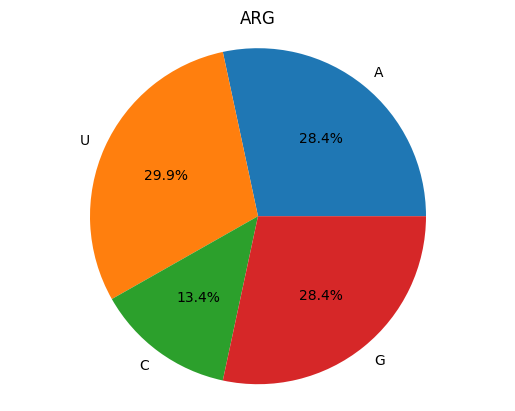

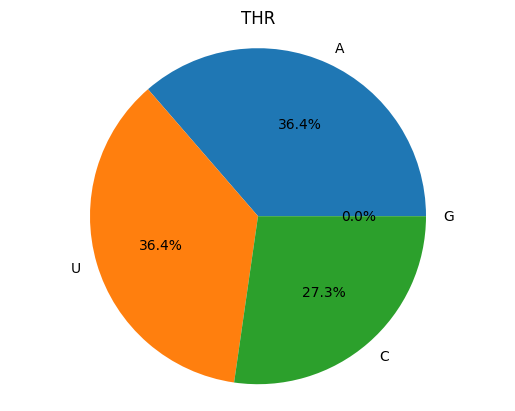

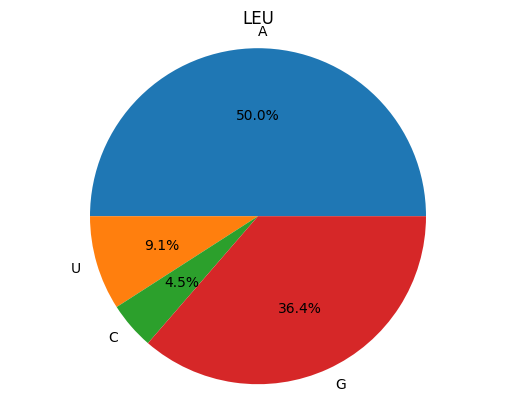

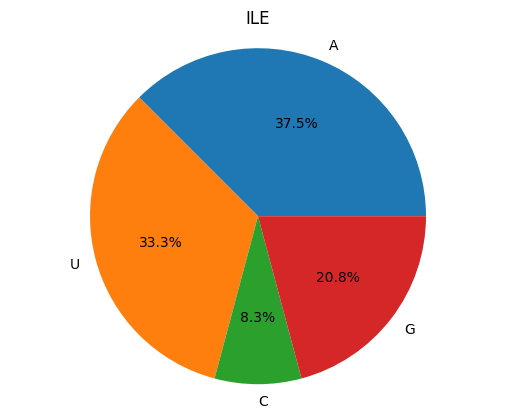

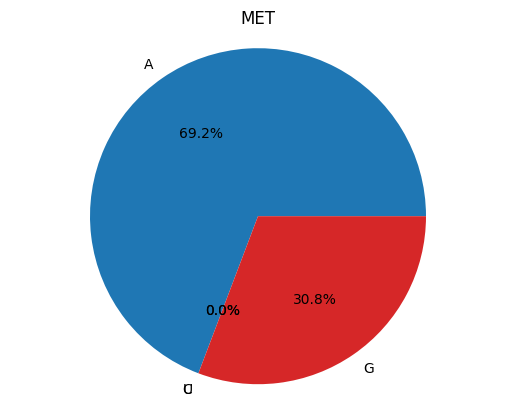

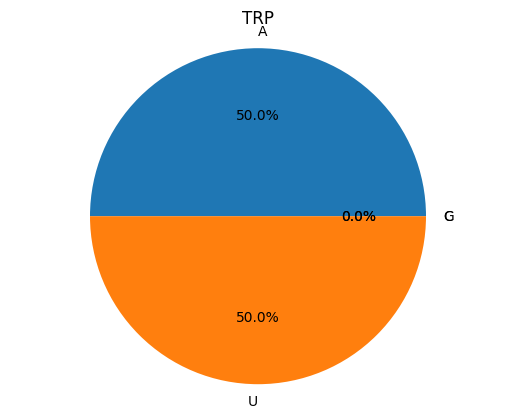

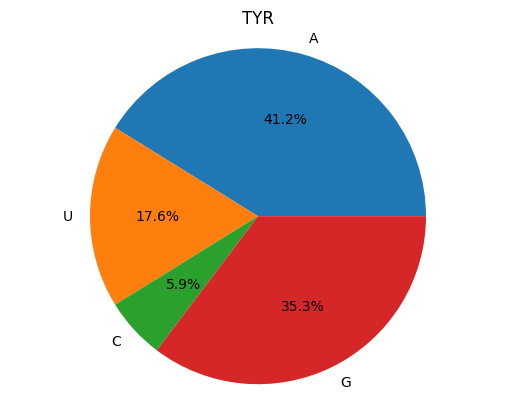

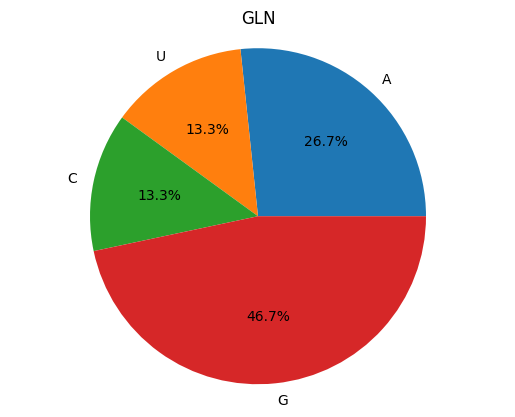

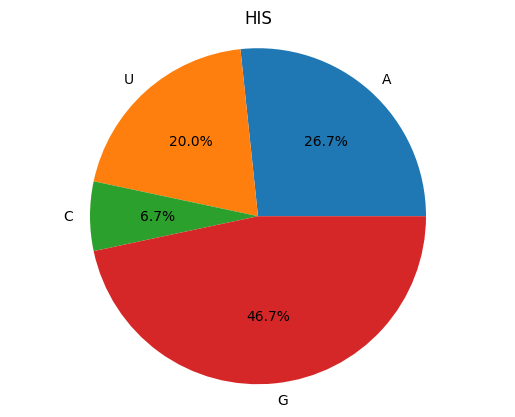

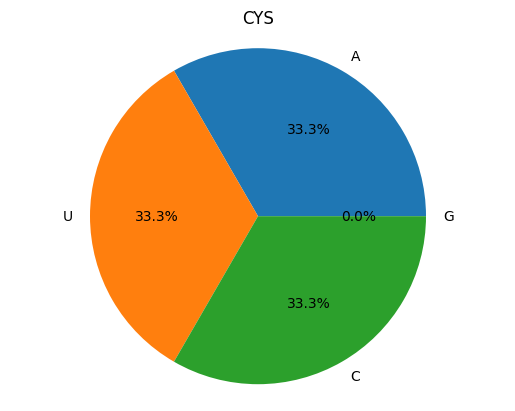

In [31]:
def plotNucleotideFrequency(frequency_df):
  for indices, row in frequency_df.iterrows():
    fig1, ax1 = plt.subplots()
    plt.title(row['Aminoacid'])
    ax1.pie([
            row[nucleotides[0]],
            row[nucleotides[1]],
            row[nucleotides[2]],
            row[nucleotides[3]]
          ],
          labels=nucleotides,
          autopct='%1.1f%%')

    ax1.axis('equal')
      
    plt.savefig(f"imgs/general/db-nucleotides-frequency/{row['Aminoacid']}.png", bbox_inches='tight')

plotNucleotideFrequency(frequency_df)

In [32]:
def getListNumclAmin(interactions, nucleotide):
  resp = []
  for i in interactions:
    if i['to'] == nucleotide:
      resp.append(i['from'])

  return resp

interaction_stats = {}

for val in interactions:
  interaction_stats[val['to']] = getListNumclAmin(interactions, val['to'])

In [33]:
def getNucleotideFreq(interaction_stats):
  frequencyNumclAmin = {}
  for key, stat in interaction_stats.items():
    frequencyNumclAmin[key] = {
      aminoacids[0]: stat.count(aminoacids[0]),
      aminoacids[1]: stat.count(aminoacids[1]),
      aminoacids[2]: stat.count(aminoacids[2]),
      aminoacids[3]: stat.count(aminoacids[3]),
      aminoacids[4]: stat.count(aminoacids[4]),
      aminoacids[5]: stat.count(aminoacids[5]),
      aminoacids[6]: stat.count(aminoacids[6]),
      aminoacids[7]: stat.count(aminoacids[7]),
      aminoacids[8]: stat.count(aminoacids[8]),
      aminoacids[9]: stat.count(aminoacids[9]),
      aminoacids[10]: stat.count(aminoacids[10]),
      aminoacids[11]: stat.count(aminoacids[11]),
      aminoacids[12]: stat.count(aminoacids[12]),
      aminoacids[13]: stat.count(aminoacids[13]),
      aminoacids[14]: stat.count(aminoacids[14]),
      aminoacids[15]: stat.count(aminoacids[15]),
      aminoacids[16]: stat.count(aminoacids[16]),
      aminoacids[17]: stat.count(aminoacids[17]),
      aminoacids[18]: stat.count(aminoacids[18]),
      aminoacids[19]: stat.count(aminoacids[19])
    }

  return frequencyNumclAmin

frequencyNumclAmin = getNucleotideFreq(interaction_stats)

In [34]:
def mountNucleotideFrequencyDf(frequency):
  plot_frequency_data = []
    
  for key, values in frequency.items():
    plot_frequency_data.append(
      [
          key,
          frequencyNumclAmin[key]['ALA'],
          frequencyNumclAmin[key]['ARG'],
          frequencyNumclAmin[key]['ASN'],
          frequencyNumclAmin[key]['ASP'],
          frequencyNumclAmin[key]['CYS'],
          frequencyNumclAmin[key]['GLN'],
          frequencyNumclAmin[key]['GLU'],
          frequencyNumclAmin[key]['GLY'],
          frequencyNumclAmin[key]['HIS'],
          frequencyNumclAmin[key]['LEU'],
          frequencyNumclAmin[key]['ILE'],
          frequencyNumclAmin[key]['LYS'],
          frequencyNumclAmin[key]['MET'],
          frequencyNumclAmin[key]['PHE'],
          frequencyNumclAmin[key]['PRO'],
          frequencyNumclAmin[key]['SER'],
          frequencyNumclAmin[key]['THR'],
          frequencyNumclAmin[key]['TRP'],
          frequencyNumclAmin[key]['TYR'],
          frequencyNumclAmin[key]['VAL']
      ]
    )

  return pd.DataFrame (
    plot_frequency_data,
    columns = [
        'Nucleotide',
        'ALA',
        'ARG',
        'ASN',
        'ASP',
        'CYS',
        'GLN',
        'GLU',
        'GLY',
        'HIS',
        'LEU',
        'ILE',
        'LYS',
        'MET',
        'PHE',
        'PRO',
        'SER',
        'THR',
        'TRP',
        'TYR',
        'VAL'
    ]
  )

frequency_df = mountNucleotideFrequencyDf(frequencyNumclAmin)
frequency_df.sort_values(by=['Nucleotide'])

,Nucleotide,ALA,ARG,ASN,ASP,CYS,GLN,GLU,GLY,HIS,...,ILE,LYS,MET,PHE,PRO,SER,THR,TRP,TYR,VAL
1,A,24,19,13,1,1,4,6,25,4,...,9,13,9,10,12,17,4,1,7,16
0,C,8,9,4,1,1,2,0,26,1,...,2,13,0,0,9,3,3,0,1,1
2,G,7,19,6,7,0,7,3,25,7,...,5,12,4,3,5,17,0,0,6,4
3,U,6,20,8,3,1,2,2,30,3,...,8,9,0,6,6,1,4,1,3,5


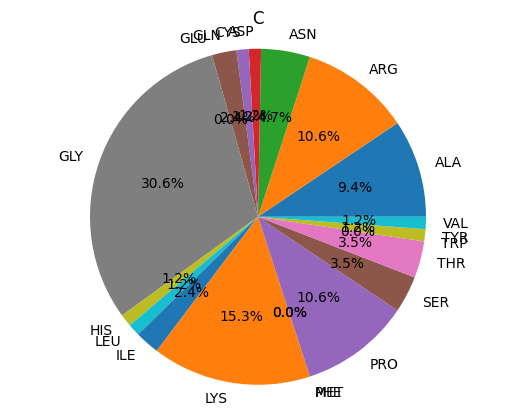

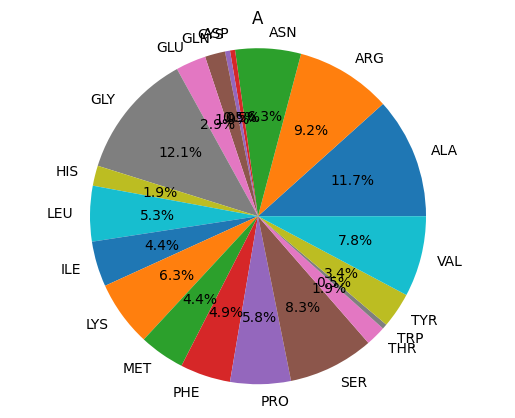

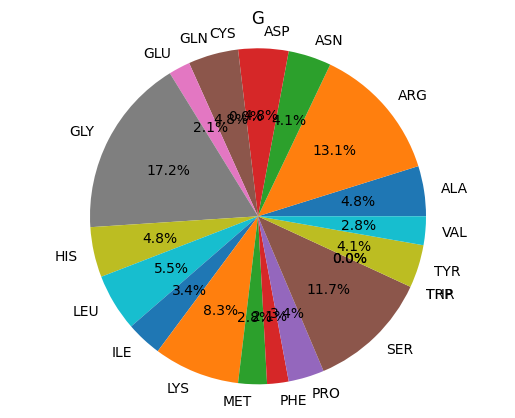

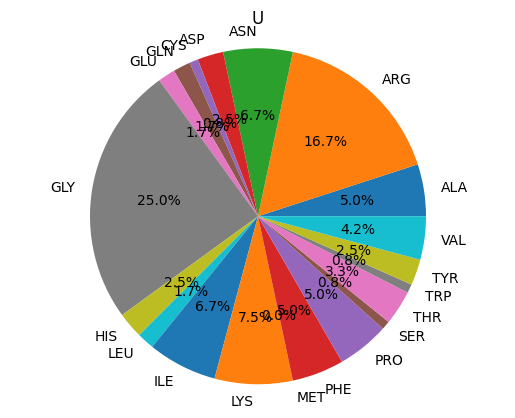

In [35]:
def plotNucleotideFreq(frequency_df):
  for indices, row in frequency_df.iterrows():
    fig1, ax1 = plt.subplots()
    plt.title(row['Nucleotide'])
    ax1.pie([
            row[aminoacids[0]],
            row[aminoacids[1]],
            row[aminoacids[2]],
            row[aminoacids[3]],
            row[aminoacids[4]],
            row[aminoacids[5]],
            row[aminoacids[6]],
            row[aminoacids[7]],
            row[aminoacids[8]],
            row[aminoacids[9]],
            row[aminoacids[10]],
            row[aminoacids[11]],
            row[aminoacids[12]],
            row[aminoacids[13]],
            row[aminoacids[14]],
            row[aminoacids[15]],
            row[aminoacids[16]],
            row[aminoacids[17]],
            row[aminoacids[18]],
            row[aminoacids[19]]
          ],
          labels=aminoacids,
          autopct='%1.1f%%')

    ax1.axis('equal')
    # plt.show()
        
    plt.savefig(f"imgs/general/db-aminoacids-frequency/{row['Nucleotide']}.png", bbox_inches='tight')

plotNucleotideFreq(frequency_df)

In [36]:
def plotHeatMap(df, file_dir):
    ax = sns.heatmap(df, annot=True, fmt="g", xticklabels=True, yticklabels=True)

    ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=9)

    plt.savefig(file_dir)
    plt.clf()

In [37]:
for aminoacid, interactions in interactionsPDB.items():
    if interactions:
        df = pd.DataFrame(0, aminoacids, columns=nucleotides)
        
        for interaction in interactions:
            df.loc[interaction['from'],interaction['to']] = df.loc[interaction['from'],interaction['to']] + 1
        
        plotHeatMap(df, f"imgs/db-pdb/{aminoacid}.png")

<Figure size 640x480 with 0 Axes>